In [103]:
# Some standard essential libraries/imports
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import random
from sklearn.preprocessing import StandardScaler

# Set random seed for notebook
random.seed(42)

###Loading Dataset

In [105]:
data_virus = pd.read_excel('2022QUB.xlsx', sheet_name='Data')

In [106]:
print("DataFrame Info:")
print(data_virus.info())

DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3801 entries, 0 to 3800
Columns: 516 entries, SID to I512
dtypes: float64(512), int64(1), object(3)
memory usage: 15.0+ MB
None


In [109]:
print("\nFirst few rows:")
print(data_virus.head())


First few rows:
  SID Type Matrix  Load   I001   I002   I003   I004   I005   I006  ...   I503  \
0  S1    X   dmem     1  97.78  97.73  97.68  97.70  97.73  97.73  ...  83.38   
1  S1    X   dmem     1  97.75  97.70  97.70  97.71  97.71  97.72  ...  83.65   
2  S1    X   dmem     1  97.76  97.72  97.70  97.74  97.71  97.71  ...  84.46   
3  S1    X   dmem     1  97.72  97.71  97.71  97.73  97.70  97.71  ...  83.96   
4  S1    X   dmem     1  97.74  97.66  97.65  97.68  97.67  97.65  ...  83.65   

    I504   I505   I506   I507   I508   I509   I510   I511   I512  
0  84.49  84.94  85.47  86.16  86.79  87.12  87.20  87.58  88.20  
1  84.77  85.34  85.27  85.69  85.52  85.27  85.28  85.41  85.65  
2  85.38  86.03  86.38  86.77  87.10  87.14  86.89  87.14  87.79  
3  84.89  85.43  85.30  85.80  86.18  86.39  86.63  87.21  87.76  
4  84.02  84.33  84.53  85.14  85.40  85.41  85.42  85.88  85.87  

[5 rows x 516 columns]


In [111]:
# Check for missing values
missing_values = data_virus.isnull().sum()
if missing_values.sum() > 0:
    print("\nColumns with missing values:")
    print(missing_values[missing_values > 0])
else:
        print("\nNo missing values found in the dataset")


No missing values found in the dataset


In [113]:
 # Summary of categorical variables
print("\nUnique values in categorical columns:")
for col in catagorical_columns:
    print(f"\n{col}: {data_virus[col].unique()}")


Unique values in categorical columns:

SID: ['S1' 'S2' 'S3' 'S4']

Type: [' X' ' Y']

Matrix: [' dmem' ' pbs']

Load: [1 2 3 4 5 6 7 8]


In [115]:
catagorical_columns = ['SID', 'Type', 'Matrix', 'Load']
intensity_wavelength = [f'I{str(i).zfill(3)}' for i in range(1, 513)]
#all_columns = catagorical_columns + intensity_wavelength

In [117]:
print("\nSample of intensity wavelength statistics:")
print(data_virus[intensity_wavelength[:5]].describe())


Sample of intensity wavelength statistics:
             I001         I002         I003         I004         I005
count  3801.00000  3801.000000  3801.000000  3801.000000  3801.000000
mean     94.65562    94.645662    94.640797    94.629976    94.617727
std       2.57733     2.584697     2.584932     2.591785     2.593300
min      80.95000    80.890000    80.830000    80.800000    80.760000
25%      92.87000    92.870000    92.860000    92.820000    92.800000
50%      94.53000    94.510000    94.520000    94.510000    94.480000
75%      96.07000    96.040000    96.030000    96.030000    96.020000
max     100.71000   100.620000   100.550000   100.540000   100.540000


In [77]:
# Select only the columns with intensity values
#intensity_wavelength = data_virus.loc[:, 'I001':'I512']
#viral_loads = data_virus['Load']


In [119]:
from sklearn.preprocessing import LabelEncoder
# Drop SID, Type and Load columns
data_virus = data_virus.drop(['SID', 'Type', 'Matrix'], axis=1)

# Create the target variable y and feature matrix X

X = data_virus[intensity_wavelength]  # Using only the intensity values as features
y = data_virus['Load']  # Use Load as the target variable

# Encode the target variable
la_load = LabelEncoder()
y = la_load.fit_transform(y)

In [88]:
# Step 3: Normalize the data
#scaler = StandardScaler()
#intensity_data_scaled = scaler.fit_transform(X)


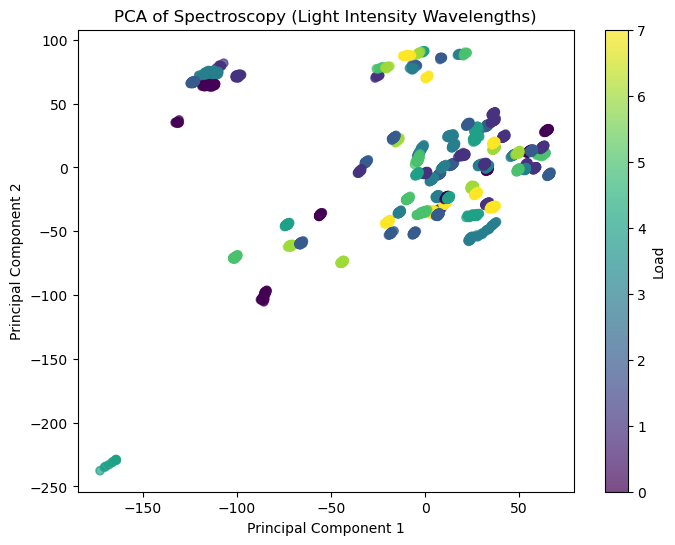

In [125]:
from sklearn.decomposition import PCA

#To visualize the data.....PCA will be performed
pca = PCA(n_components=2)  
X_pca = pca.fit_transform(X)

plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='viridis', alpha=0.7)
plt.colorbar(label='Load')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of Spectroscopy (Light Intensity Wavelengths)')
plt.show()

In [212]:
pca_df = pd.DataFrame(X_pca, columns=['PCA1', 'PCA2'])
pca_df

,PCA1,PCA2
0,-132.927648,35.179367
1,-132.516838,35.465063
2,-130.880498,37.221234
3,-131.682591,35.798248
4,-131.813629,35.288048
...,...,...
3796,27.862587,-19.544491
3797,27.664804,-20.188208
3798,27.603352,-19.712797
3799,27.350987,-20.442551


In [129]:
# Calculate cumulative explained variance
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)

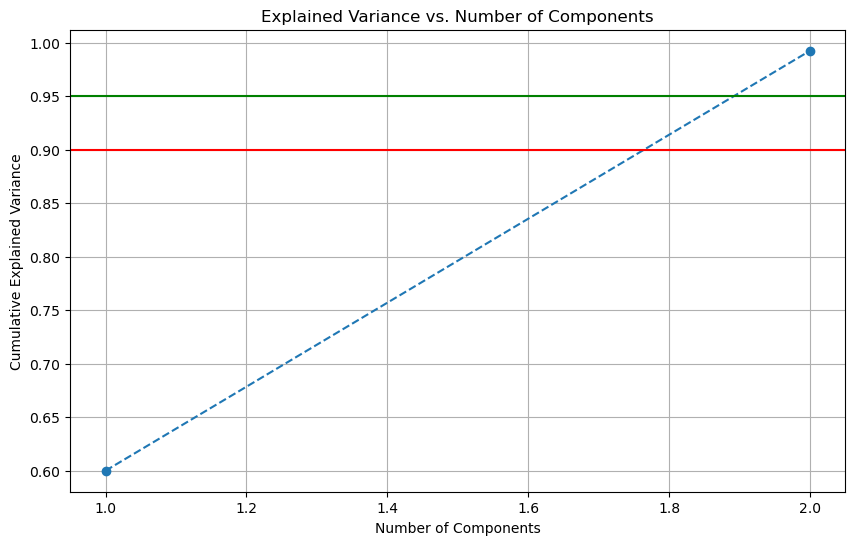

In [131]:
# Plot cumulative explained variance
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o', linestyle='--')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance vs. Number of Components')
plt.axhline(y=0.90, color='r', linestyle='-')  # For 90% threshold line
plt.axhline(y=0.95, color='g', linestyle='-')  # For 95% threshold line
plt.grid(True)
plt.show()

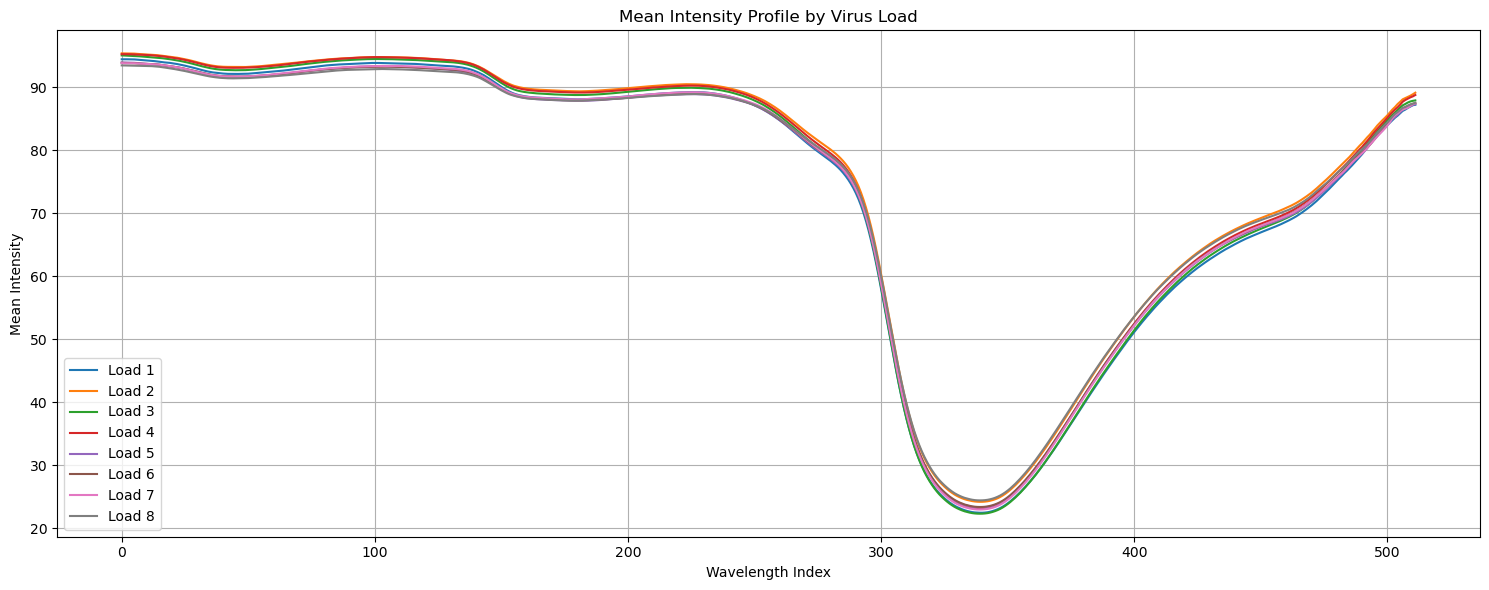

In [135]:
# Mean intensity profile for each virus type
plt.figure(figsize=(15, 6))
for virus_load in data['Load'].unique():
    virus_data = data[data['Load'] == virus_load][intensity_wavelength]
    mean_intensity = virus_data.mean()

    plt.plot(range(len(intensity_wavelength)),
             mean_intensity.values,
             label=f'Load {virus_load}')

plt.title('Mean Intensity Profile by Virus Load')
plt.xlabel('Wavelength Index')
plt.ylabel('Mean Intensity')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [139]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the scaler
scaler = StandardScaler()

# Fit the scaler on the training data, then transform both training and test sets
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


# Verify the shapes of the resulting splits
print("Training set shape:", X_train.shape, y_train.shape)
print("Test set shape:", X_test.shape, y_test.shape)

Training set shape: (3040, 512) (3040,)
Test set shape: (761, 512) (761,)


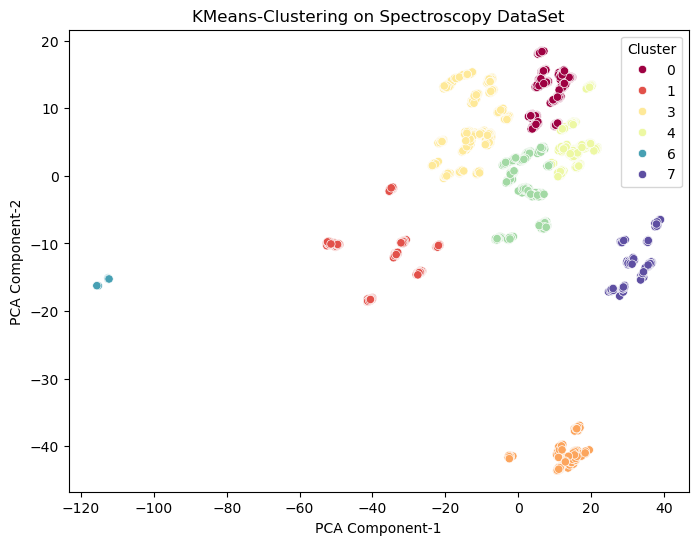

In [176]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import seaborn as sns
import matplotlib.pyplot as plt

# Initialize and fit KMeans
kmeans = KMeans(n_clusters=8, random_state=0, n_init='auto')
Clusters=kmeans.fit(X_train_scaled)

# Use PCA for visualization
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train_scaled)

# Create a scatterplot with cluster labels
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_train_pca[:, 0], y=X_train_pca[:, 1], hue=kmeans.labels_, palette='Spectral')
plt.xlabel('PCA Component-1')
plt.ylabel('PCA Component-2')
plt.title('KMeans-Clustering on Spectroscopy DataSet')
plt.legend(title='Cluster')
plt.show()

In [151]:
# Metric-based evalaution of the clusters generated
from sklearn.metrics import silhouette_score
silhouette_score(X_train_scaled, kmeans.labels_, metric='euclidean')

0.4852774290537034

In [222]:
# Define the range of K values
# E.g. range(2, 9)
K = range(2, 9)

# Set up lists to hold fits and scores
fits = []
score_K = []

# Loop through K values and fit/evaluate KMeans models
for k in K:
    # Train the model for current value of k on training data
    model = KMeans(n_clusters = k, random_state = 0, n_init='auto').fit(X_train_scaled)
    # Append the model to fits
    fits.append(model)
    # Append the silhouette score to scores
    score_K.append(silhouette_score(X_train_scaled, model.labels_, metric='euclidean'))

In [161]:
score_K

[0.46356288344764457,
 0.4937301915579818,
 0.4855446089575953,
 0.4495653232618788,
 0.46694334107579083,
 0.4715856150950944]

<Axes: >

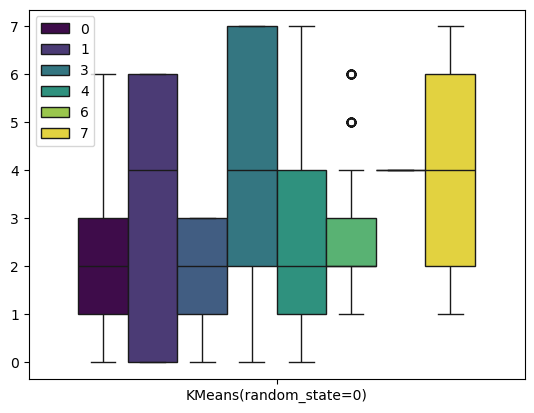

In [246]:
# Examine boxplots for clusters for some models 
sns.boxplot(x =Clusters, y = y_train, hue=fits[6].labels_, palette='viridis')

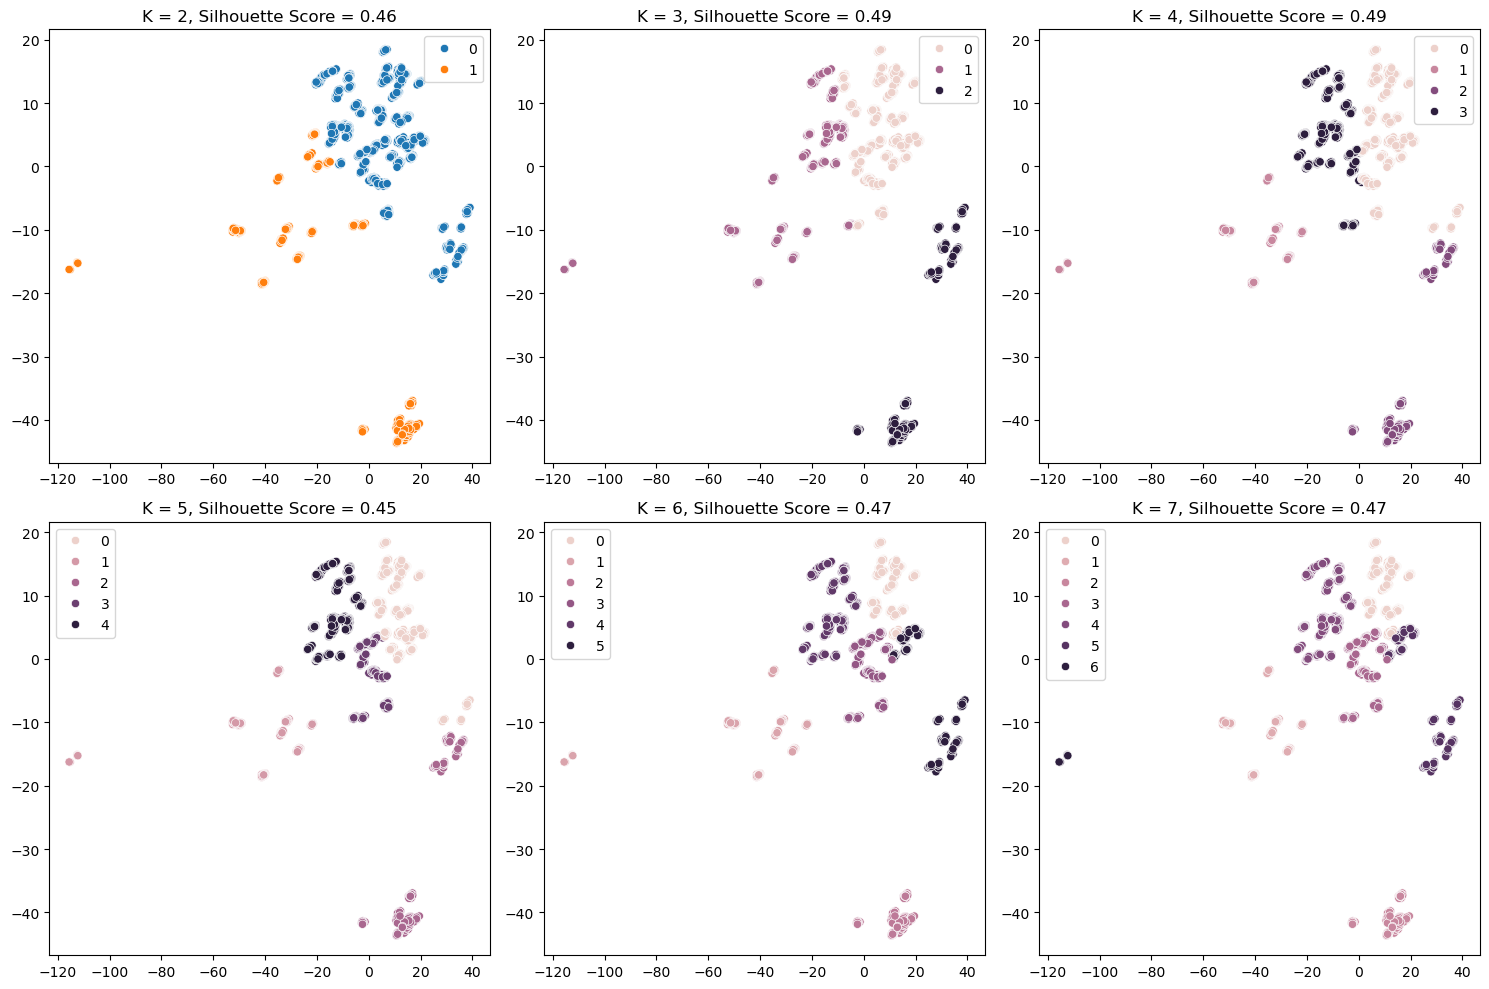

In [218]:
# Create subplots
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
axes = axes.flatten()

# Create scatterplots for resulsts obtained with different values of K

# Iterate over different values of K
for i, k in enumerate(K):
    # Plot the data points colored by cluster labels
    sns.scatterplot(x=X_train_pca[:, 0], y=X_train_pca[:, 1], hue=fits[i].labels_, ax=axes[i])
    axes[i].set_title(f'K = {k}, Silhouette Score = {score[i]:.2f}')

# Adjust the layout and show the plots
plt.tight_layout()
plt.show()

<Axes: >

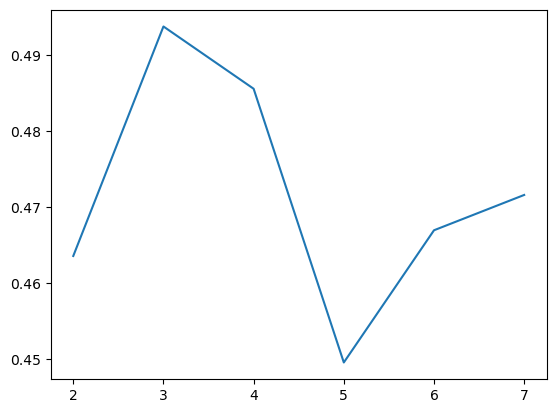

In [163]:
sns.lineplot(x = K, y = score_K)

In [153]:
# Step 3: Model Selection - Applying KMeans and evaluating with Elbow Method
inertia = []
cluster_range = range(1, 11)
for k in cluster_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_train_scaled)
    inertia.append(kmeans.inertia_)

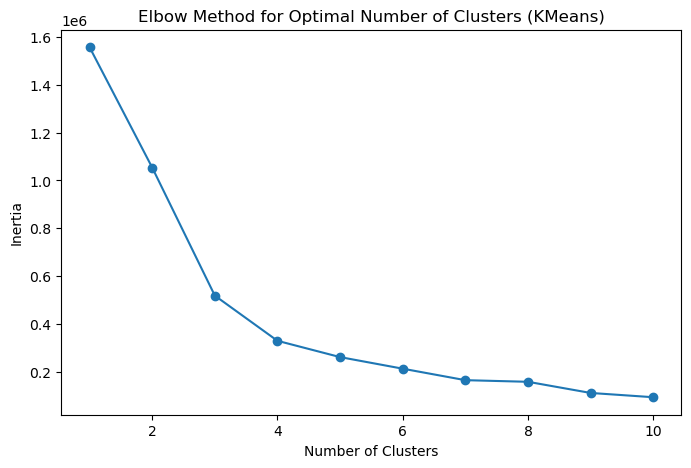

In [155]:
# Plot Elbow Curve
plt.figure(figsize=(8, 5))
plt.plot(cluster_range, inertia, marker='o')
plt.title('Elbow Method for Optimal Number of Clusters (KMeans)')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()

Mean viral load per cluster:
Cluster
KMeans(random_state=0)    4.015259
Name: Load, dtype: float64


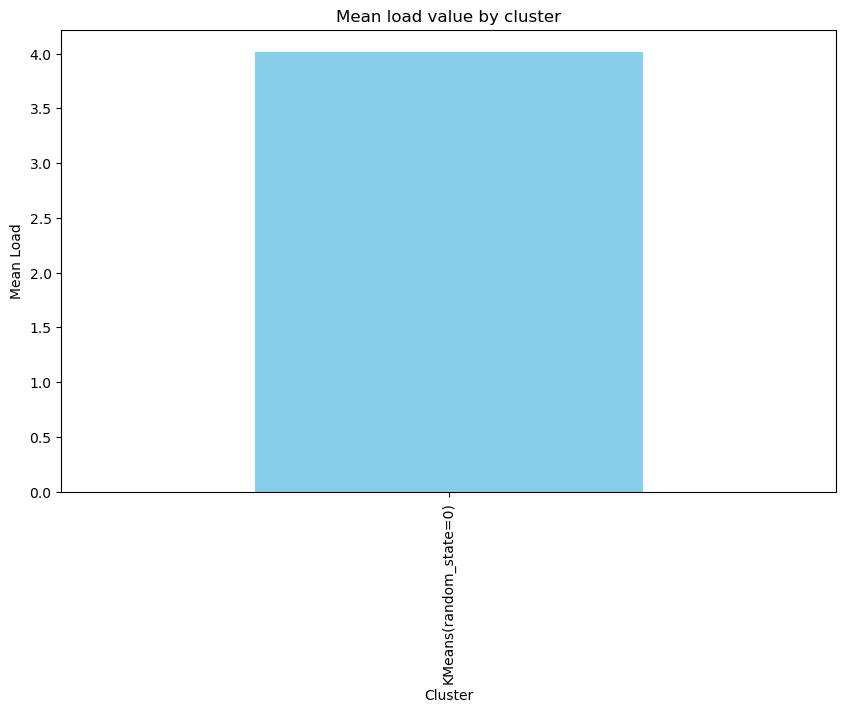

In [184]:
# Add clusters to data and calculate mean viral load per cluster
data_virus['Cluster'] = Clusters

mean_viral_loads = data_virus.groupby('Cluster')['Load'].mean()
print("Mean viral load per cluster:")
print(mean_viral_loads)

plt.figure(figsize=(10,6))
mean_viral_loads.plot(kind='bar', color='skyblue')
plt.xlabel('Cluster')
plt.ylabel('Mean Load')
plt.title('Mean load value by cluster')
plt.show()

Cluster Mean Load vs. Closest Expected Load:
                        Cluster Mean Load  Closest Expected Load
Cluster                                                         
KMeans(random_state=0)           4.015259                      4


<Figure size 1000x600 with 0 Axes>

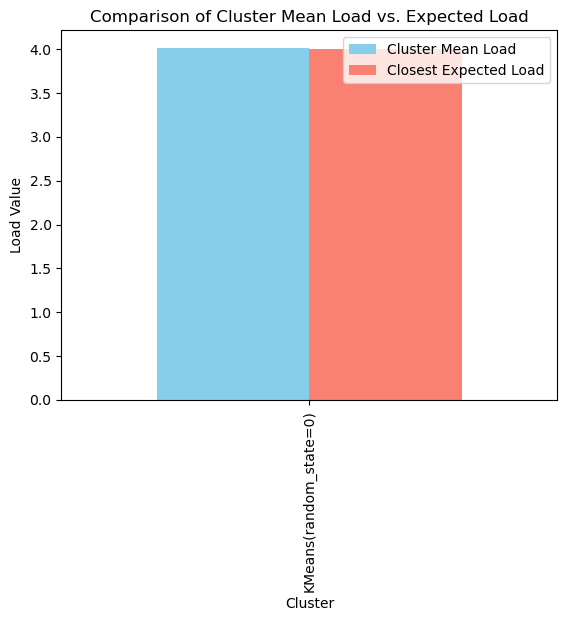

In [186]:
# Compare each cluster's mean Load to expected Load values (1-8)
expected_loads = range(1, 9)
closest_expected_loads = mean_viral_loads.apply(lambda x: min(expected_loads, key=lambda y: abs(y - x)))

# Display the mean Load and the closest expected Load for each cluster
comparison_df = pd.DataFrame({
    'Cluster Mean Load': mean_viral_loads,
    'Closest Expected Load': closest_expected_loads
})

print("Cluster Mean Load vs. Closest Expected Load:")
print(comparison_df)

# Visualize the comparison
plt.figure(figsize=(10, 6))
comparison_df.plot(kind='bar', color=['skyblue', 'salmon'], width=0.8)
plt.title('Comparison of Cluster Mean Load vs. Expected Load')
plt.xlabel('Cluster')
plt.ylabel('Load Value')
plt.legend(['Cluster Mean Load', 'Closest Expected Load'])
plt.show()

In [188]:
load_cluster_counts = pd.crosstab(data_virus['Cluster'], data_virus['Load'])

Count of Each Load Value in Each Cluster:
Load                      1    2    3    4    5    6    7    8
Cluster                                                       
KMeans(random_state=0)  360  671  720  770  320  320  320  320


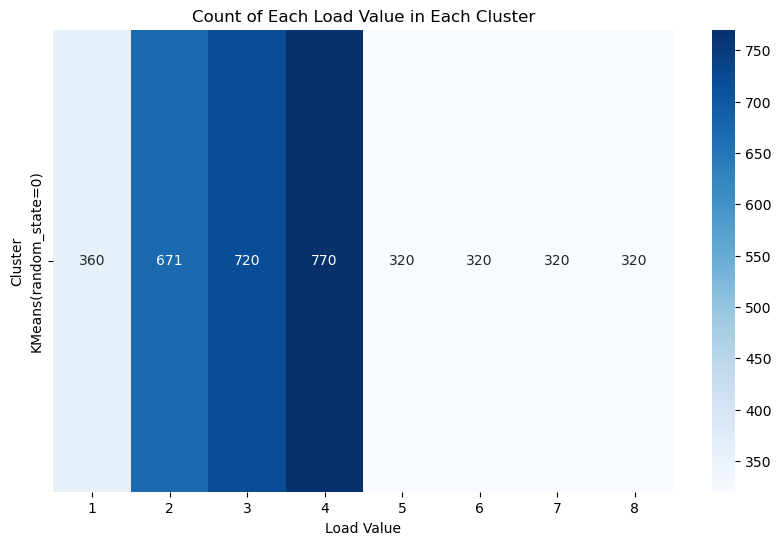

In [190]:
# Display the table
print("Count of Each Load Value in Each Cluster:")
print(load_cluster_counts)

# Optional: Visualize the table as a heatmap
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.heatmap(load_cluster_counts, annot=True, cmap='Blues', fmt='d')
plt.title('Count of Each Load Value in Each Cluster')
plt.xlabel('Load Value')
plt.ylabel('Cluster')
plt.show()

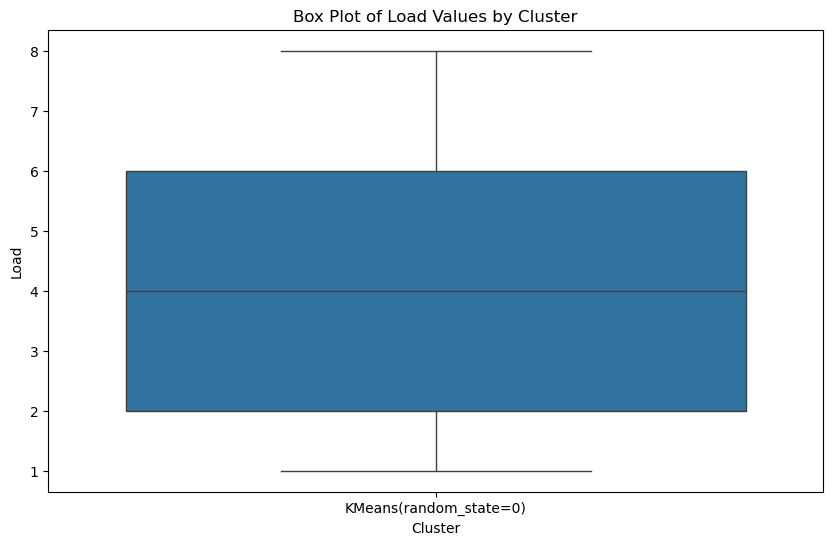

In [200]:
# Box Plot
plt.figure(figsize=(10, 6))
sns.boxplot(data=data_virus, x='Cluster', y='Load')
plt.title('Box Plot of Load Values by Cluster')
plt.xlabel('Cluster')
plt.ylabel('Load')
plt.show()

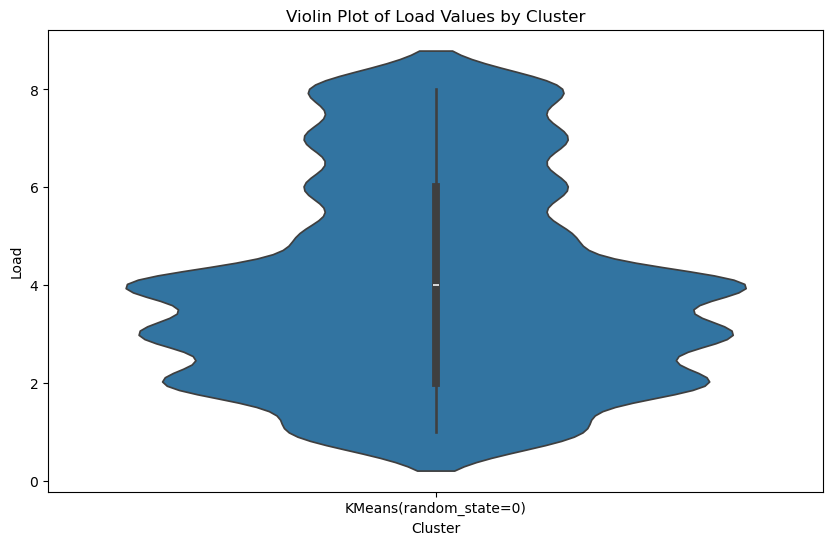

In [204]:
# Violin Plot
plt.figure(figsize=(10, 6))
sns.violinplot(data=data_virus, x='Cluster', y='Load')
plt.title('Violin Plot of Load Values by Cluster')
plt.xlabel('Cluster')
plt.ylabel('Load')
plt.show()

In [208]:



# Ensure that both X_train and X_train_norm are DataFrames
if not isinstance(X_train, pd.DataFrame):
    X_train = pd.DataFrame(X_train)

if not isinstance(X_train_norm, pd.DataFrame):
    X_train_norm = pd.DataFrame(X_train_scaled)

# Apply KMeans clustering to get 8 clusters directly
kmeans = KMeans(n_clusters=8, random_state=0)
X_train['Cluster'] = kmeans.fit_predict(X_train_norm)  # Fit and predict on the normalized data

# Ensure y_train is a DataFrame so that 'Load' column can be accessed
if not isinstance(y_train, pd.DataFrame):
    y_train = pd.DataFrame(y_train, columns=['Load'])
# Plot 'Load' values across clusters in a boxplot
sns.boxplot(x='Cluster', y=y_train['Load'], data=X_train_scaled, palette="Set3")

# Set plot title and labels
plt.title('Boxplot of Load by Cluster (KMeans)')
plt.xlabel('Cluster')
plt.ylabel('Load')
plt.show()

IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

In [194]:
from sklearn.cluster import KMeans
import seaborn as sns
import matplotlib.pyplot as plt

# Apply KMeans clustering to get 8 clusters directly
kmeans = KMeans(n_clusters=8, random_state=0)
X_train['Cluster'] = kmeans.fit_predict(X_train_scaled)  # Fit and predict on the normalized data

# Plot 'Load' values across clusters in a boxplot
sns.boxplot(x='Cluster', y=y_train['Load'], data=X_train, palette="Set3")

# Set plot title and labels
plt.title('Boxplot of Load by Cluster (KMeans)')
plt.xlabel('Cluster')
plt.ylabel('Load')
plt.show()

IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

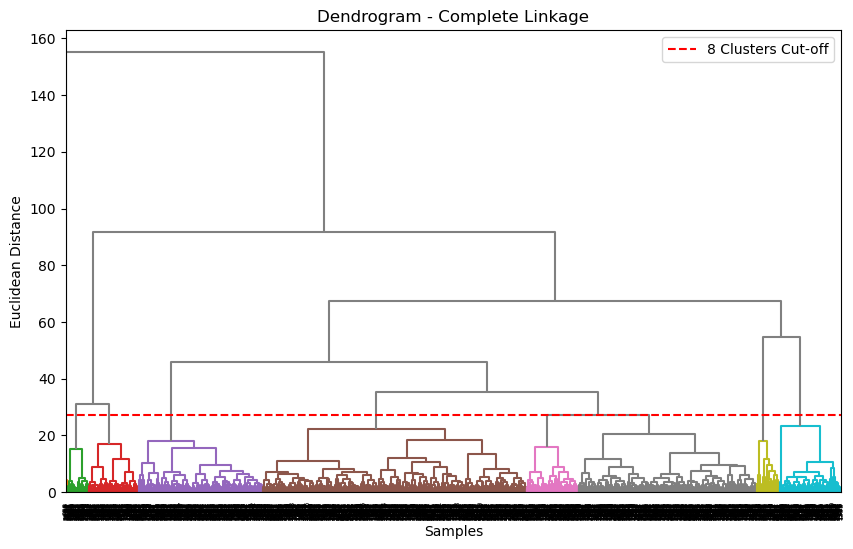

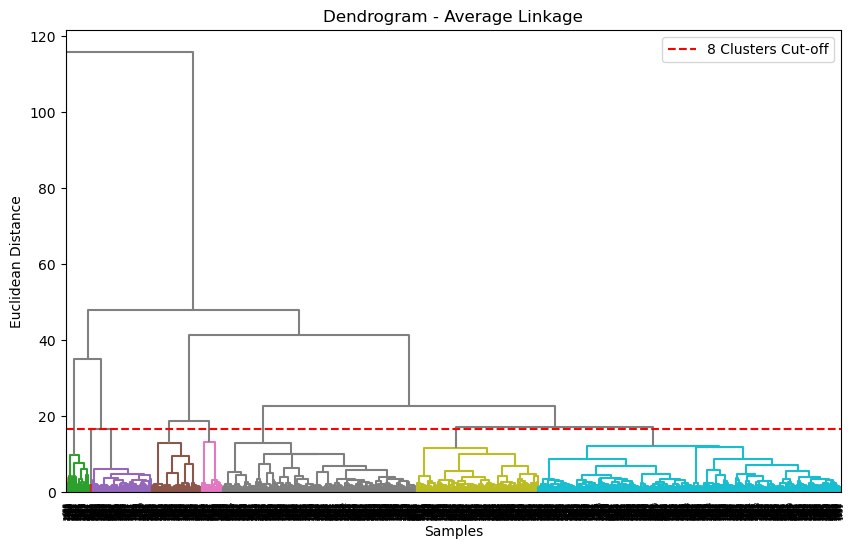

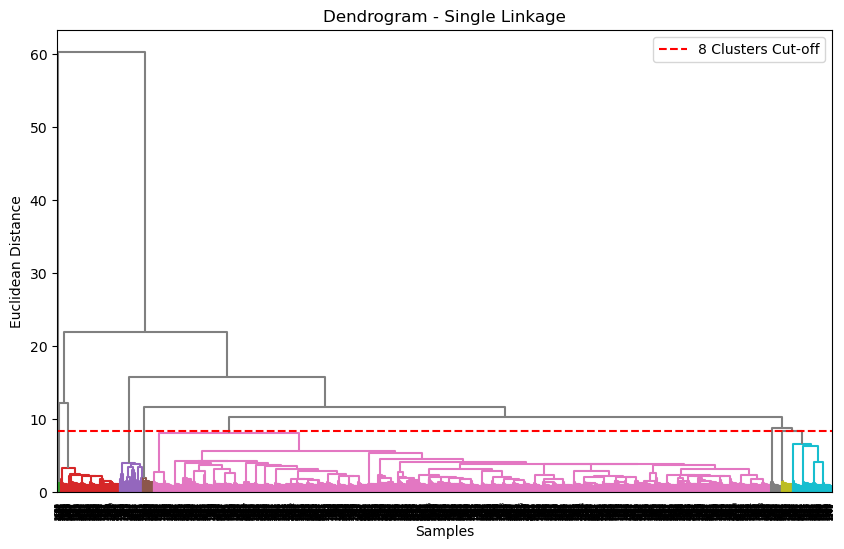

In [192]:
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import linkage, dendrogram

# Define the number of clusters to highlight
num_clusters = 8

# Compute linkage for each method using normalized data
complete_clustering = linkage(X_train_scaled, method="complete", metric="euclidean")
average_clustering = linkage(X_train_scaled, method="average", metric="euclidean")
single_clustering = linkage(X_train_scaled, method="single", metric="euclidean")

# Function to plot dendrogram with colored clusters
def plot_colored_dendrogram(linkage_matrix, title, num_clusters):
    plt.figure(figsize=(10, 6))

    # Calculate the cut-off distance for the specified number of clusters
    cutoff_distance = linkage_matrix[-num_clusters, 2]

    # Plot dendrogram with color threshold to highlight clusters
    dendrogram(
        linkage_matrix,
        color_threshold=cutoff_distance,  # Set color threshold at cut-off distance
        above_threshold_color="gray"      # Use gray for links above the cut-off
    )

    # Add horizontal line to indicate the cut-off for clusters
    plt.axhline(y=cutoff_distance, color='red', linestyle='--', label=f'{num_clusters} Clusters Cut-off')

    # Add plot labels
    plt.title(f'Dendrogram - {title} Linkage')
    plt.xlabel('Samples')
    plt.ylabel('Euclidean Distance')
    plt.legend()
    plt.show()

# Plot dendrograms for each linkage method with highlighted clusters
plot_colored_dendrogram(complete_clustering, 'Complete', num_clusters)
plot_colored_dendrogram(average_clustering, 'Average', num_clusters)
plot_colored_dendrogram(single_clustering, 'Single', num_clusters)